# Importing Neccessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

# Data preparation

In [8]:
# Set the path to the root directory of the orange dataset
root_dir = r"C:\Users\LENOVO\Desktop\Program files\PycharmProjects\Machine_vision_based_fruitSorting_system\Data_collection\DataCollected\oranges"

os.listdir(root_dir)

['ripe', 'unripe']

In [9]:
# Create the train, validation, and test directories
train_dir = os.path.join(root_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(root_dir, 'valid')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(root_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [10]:
os.listdir(root_dir)

['ripe', 'test', 'train', 'unripe', 'valid']

In [11]:
# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Loop through the classes (ripe and unripe) and split the data
for class_name in os.listdir(root_dir):
    if class_name in ["ripe", "unripe"]:
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            file_list = os.listdir(class_dir)
            random.shuffle(file_list)
            num_files = len(file_list)
            num_train = int(num_files * train_ratio)
            num_valid = int(num_files * valid_ratio)
            train_files = file_list[:num_train]
            valid_files = file_list[num_train:num_train+num_valid]
            test_files = file_list[num_train+num_valid:]
            for file_name in train_files:
                src_path = os.path.join(class_dir, file_name)
                dst_path = os.path.join(train_dir, class_name, file_name)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)
                shutil.copyfile(src_path, dst_path)
            for file_name in valid_files:
                src_path = os.path.join(class_dir, file_name)
                dst_path = os.path.join(valid_dir, class_name, file_name)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)
                shutil.copyfile(src_path, dst_path)
            for file_name in test_files:
                src_path = os.path.join(class_dir, file_name)
                dst_path = os.path.join(test_dir, class_name, file_name)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)
                shutil.copyfile(src_path, dst_path)

In [13]:
# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = r"C:\Users\LENOVO\Desktop\Program files\PycharmProjects\Machine_vision_based_fruitSorting_system\Data_collection\DataCollected\oranges\train"
valid_dir = r"C:\Users\LENOVO\Desktop\Program files\PycharmProjects\Machine_vision_based_fruitSorting_system\Data_collection\DataCollected\oranges\valid"

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

Found 1340 images belonging to 2 classes.
Found 287 images belonging to 2 classes.


# model architecture

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=3,
                    validation_data=valid_generator, validation_steps=50)

Epoch 1/3
100/100 [==============================] - 101s 892ms/step - loss: 0.1631 - accuracy: 0.9201 - val_loss: 0.0064 - val_accuracy: 0.9965


# Visualiing train and validation loss

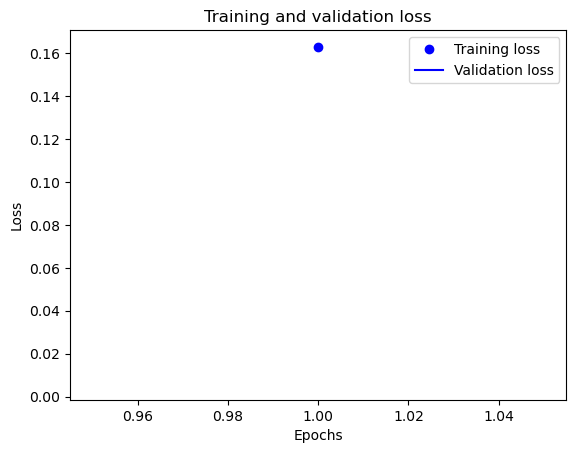

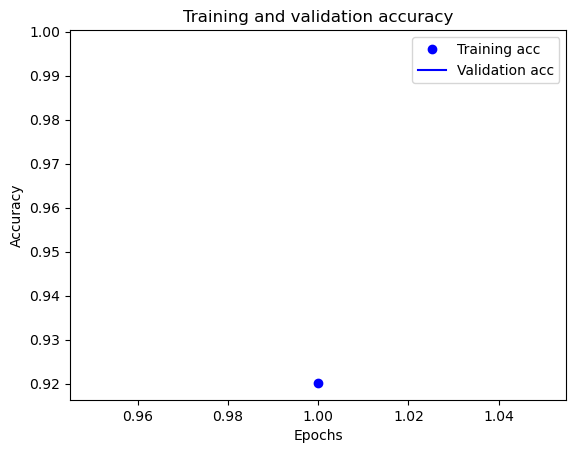

In [17]:
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model evaluation

In [20]:
test_dir = r"C:\Users\LENOVO\Desktop\Program files\PycharmProjects\Machine_vision_based_fruitSorting_system\Data_collection\DataCollected\oranges\test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=10)

print('Test accuracy:', test_acc)

Found 289 images belonging to 2 classes.
10/10 [==============================] - 2s 230ms/step - loss: 0.0077 - accuracy: 0.9950
Test accuracy: 0.9950000047683716


In [21]:
# Generate predictions for the test set
test_generator.reset()
Y_pred = model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred = np.round(Y_pred)

# Get the true labels
Y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(Y_true, y_pred)

print('Confusion matrix:')
print(cm)

15/15 [==============================] - 4s 231ms/step
Confusion matrix:
[[74 69]
 [70 76]]


# saving the trained model

In [22]:
model.save('orange_classifier.h5')